# Simple Linear Regression

### Load Required Libraries

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

### Training data

In [65]:
df = pd.read_csv("datasets/homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


### Plotting training data

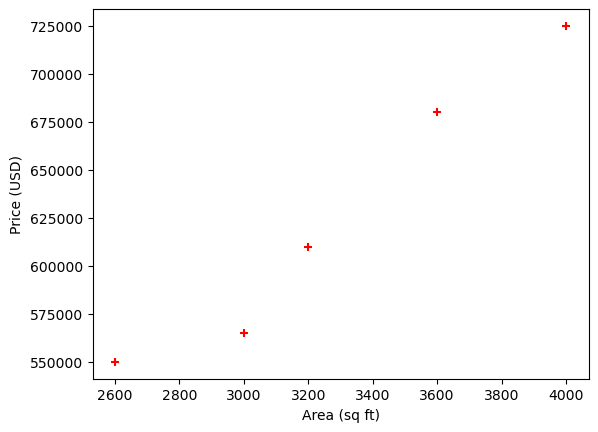

In [66]:
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (USD)')
plt.scatter(df['area'], df['price'], color='red', marker='+')

### Linear Regression

We are use our training dataset to fit to fit a linear model `y = mx + b`.

__Remember__: The first parameter of the `fit` model's method requires a 2D array. We use `df[['col']]` instead of `df['col']`

In [ ]:
# Initialize model
model = linear_model.LinearRegression()
# Fitting data to model
model.fit(df[['area']], df['price']) #x=area, y=price
print("Model fitted successfully")

LinearRegression()

## Prediction
Like before the `predict` method also expects a 2d array (column vector), so we pass in `[[number]]` to make a 2d array with a single value

In [68]:
model.predict([[3300]])

array([628715.75342466])

In [69]:
model.predict([[2500]])

array([520085.61643836])

##### Coeficient
The slope `m` in `y = mx + b` is given by

In [70]:
model.coef_

array([135.78767123])

##### Intercept
The intercept `b` in `y = mx + b`

In [71]:
model.intercept_

180616.43835616432

### Prediction using estimates of m and b for area=2500

In [72]:
area = 2500
m = model.coef_
b = model.intercept_
y = (m*area) + b

print('For a house of area', area, 'the price will be:', y, "[Equation]")
print('For a house of area', area, 'the price will be:', model.predict([[area]]), "[Model]")

For a house of area 2500 the price will be: [520085.61643836] [Equation]
For a house of area 2500 the price will be: [520085.61643836] [Model]


## Testing data
Let see how our model perform on unseen data. Here, we use out test data to evaluate our model

In [73]:
areas = pd.read_csv("datasets/areas.csv")
areas.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
area,1000,1500,2300,3540,4120,4560,5490,3460,4750,2300,9000,8600,7100


## Predicting for an array of values

In [74]:
model.predict(areas)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

### Adding predicted values as a column in our test data

In [75]:
areas['Predicted Prices'] = model.predict(areas)
areas

,area,Predicted Prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


### Plotting predictions

We plot our training set and overlay our model regression line.

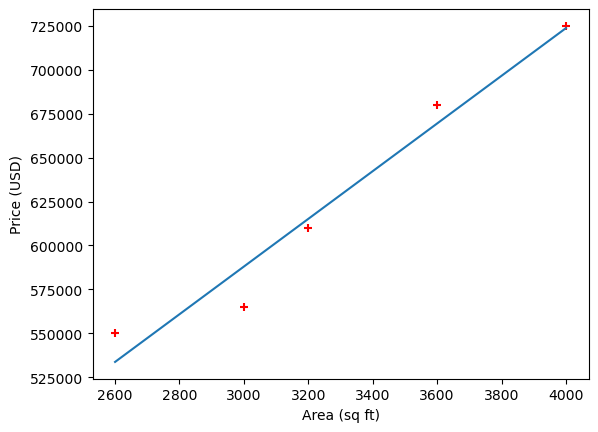

In [76]:
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (USD)')
plt.scatter(df['area'], df['price'], color='red', marker='+')
plt.plot(df['area'], model.predict(df[['area']]))